# Python and computing tools introduction
Auhtor: Artur Kalinowski

# Containers

During the class we will use multiple packages and programs specific for high energy physics (HEP). To avoid the burden of installing and configuring them on every machine, we will use virtual environments known as containers. Containers are lightweight versions of old time virtual machines. Two popular environments used to run the containers are:

* [Aptainer](https://apptainer.org/) (previously singularity)
* [Docker](https://www.docker.com/)

Both Docker and Aptainer can use the same input files. Docker is available for any operating system, Aptainer only for Linux ones. We will use a 
[akalinow/root-fedora35](https://hub.docker.com/repository/docker/akalinow/root-fedora35/general) container prepared for the classes. This is a container based on Fedora Linux ditribution, and conains all packages we will use during the classes.

Detailed instructions on installing and starting Docker are given [here](https://github.com/akalinow/Modern_Particle_Physics_Experiments/blob/2022_2023/Docker/README.md)

# Visual Studio Code

Visual studio code has a number of usefull extentions allowing to connect to running containers. `We encourage` you to try it at home.

# Python introduction

In [ ]:
#Single line comment starts with a single hash sign: #

'''
Multi line comment starts and ends with triple quatation mark.
'''

# A library is loaded with import
import math

# A library can be loaded, and given an alias 
import math as m

# A single module or function witin library is loaded with
from math import atan

In [ ]:
# Printout to screen is made with `print(...)` function
print("Helo world.")

#Nice formatting can be made with `format(...)` function of a string class:
print("Pi is roughly {}, more precisely {:.4f}".format(3.14, 4.0*atan(1.0)))

#An eycandy colored text can be printer using package colored
from termcolor import colored

print("Quarks have thre colors: ",colored("R","red"),colored("G","green"),colored("B","blue") )

# Library, but also class members can be listed with dir(...) function:
print(dir(math))

In [ ]:
#Variables are defined with name and value. Typing is not required
text = "A string variable."

print(text)
print("The \"text\" variable has type",type(text))

#Object variables and methods can be listed with dir(...) function:
print(dir(text))

In [ ]:
#Conditional statement is created using if, elif and else statements:
x = 11

if x%2==0:
    print("x variable is even")
elif x%2==1:
    print("x variable is odd")
else:
    print(colored("This branch should never activate","red"))
    
#Iteration is made with for statement:
for x in range(0,10):
    print(x, end=" ")  

In [ ]:
#Some basic composite types:

# List
x = [1,2,3,4,5]

index = 0
print("Value of list item with index {} is {}".format(index,x[index]))

# Tuple - a constant list
x = (10,20)
print("Value of tuple item with index {} is {}".format(index,x[index]))
#x[0] = 12 # <--- this line gives error - you can not modify a tuple

# Dictionary - an "list" indexed by key objects
empty_dict = {}
x = {"one": 1, "two": 2, "three": 3}
print("The full dictionary:",x)
index = "one"
print("Value of dictionary item with index \"{}\" is {}".format(index,x[index]))

In [ ]:
## Functions are defined with def statement.
## functions can return many values - in that case a function returns tuple

def myFunc(x):
    return x, x**2

x = myFunc(2)

print("Type of x is ",type(x))
print("Content of x is: ",x)

#Multiple values returned by function cen be directly assigned to variables
a,b = myFunc(2)
print("a = {}, b = {}".format(a,b))

#It is also possible to catch only selected variables
_,c = myFunc(2)
d,_ = myFunc(2)
print("c = {}, d = {}".format(c,d))

# Introduction to packages used during the Workshop

During this workshop we will use only a core set of packages used for computation and plotting:

* [numpy](https://numpy.org/) - The fundamental package for scientific computing with Python
* [matplotlib](https://matplotlib.org/) - Visualization with Python
* [ROOT](https://root.cern/doc/master/group__tutorial__pyroot.html) - Data analysis framework used in the hight energy physics community

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT

Welcome to JupyROOT 6.24/04


## Numpy

In [ ]:
#Numpy is a powerful library for mathematical operations. In particular is provides advanced matrix operations.

x = np.array([(1,2,1),(5,5,4), (0,1,2)])
print(colored("x :\n","blue"),x,"\n")
print(colored("The shape of x is:","blue"),x.shape,"\n")

y = np.identity(x.shape[0])

#Most of the matrix operations are element-wise
print(colored("Result of x+y:\n","blue"),x+y,"\n")

#Ordinary mathematical matrix operations have to selected with proper method:
print(colored("Result of x dot y:\n","blue"), x.dot(y),"\n")

#Matrices are extended (broadcasted) when dimensions do not allow for element wise operations.
#the broadcasting is performed if is it possible for given input matrices shape:
y = np.array([[1,2,3]])
print(colored("y maxtrix is:\n","blue"), y, "\n")
print(colored("Result of x*y:\n","blue"),x*y,"\n")

#The broadcasting is performed if is it possible for given input matrices shape.
#Select first two columns of the y matrix:
y = y[:,0:2]
print(colored("y maxtrix is:\n","blue"),y,"\n")
#print("Result of x*y:\n {}\n".format(x*y)) #<-- this line gives error, shape do not match for broadcasting

#Create a 4x4 matrix filled with 1.0
x = np.full((4,4), 1.0)
print(colored("x matrix is:\n","blue"),x,"\n")

#Sum all elements
print(colored("Total sum of elements is:","blue"),np.sum(x))

#Sum all columns
print(colored("Total sum of columns for each row is:","blue"),np.sum(x, axis=1))

## Matplotlib

Basic plots are made with matplotlib library. More advanced plots can be made with [seaborn](https://seaborn.pydata.org/) library

In [ ]:
#Create z 2x2 plot set. Control plot size with figsize parameter
axes = plt.figure(figsize=(10,10)).subplots(2, 2);

#Create a list of points on the X axis
x = np.arange(0,2.0*np.pi,0.01)

#Calculate the desired functions for all the points in one line
y1 = np.sin(x)
y2 = np.cos(x)

#Plot many lines on a single figure (called "axis" in matplotlib)
axes[0,0].plot(x, y1, label="sin(x)")
axes[0,0].plot(x, y2, label="cos(x)")
axes[0,0].legend()
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')

#Plot on a different axis. X values are not provided - put index of a value on the X axis
#Use Latex in labels, change a line style
axes[0,1].plot(2*y1, label=r"$2\cdot sin(x)$", linewidth=3, linestyle="--",color="brown")
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].legend()

#Draw set of random points: 2 columns of 100 rows from a uniform distribution
data = np.random.rand(2,100)
print(colored("Random data matrix shape is:","blue"),data.shape)

#Use each columns as a point coordinate
axes[1,0].scatter(data[0,:], data[1,:], label="random points")
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')

#Draw a set of random numberd from normal distribution
data = np.random.randn(10000)

#Plot a histogram of data values
axes[1,1].hist(data, bins=20);
axes[1,1].set_xlabel('Number of points')
axes[1,1].set_ylabel('Value');

## ROOT

Data analysis can be mede with ROOT. This includes:

* plotting
* histogram operations (much more convenient than in other packeges)
* function fit to data
* much more...

Function integral =  0.9999702503316914
Formula based function:     breit_wigner 
         breit_wigner : [1]/TMath::Pi()/2/(TMath::Power(x - [0],2) + TMath::Power([1]/2,2)) Ndim= 1, Npar= 2, Number= 0 
 Formula expression: 
	[Gamma]/TMath::Pi()/2/(TMath::Power(x-[m],2)+TMath::Power([Gamma]/2,2)) 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: aCanvas
Warning in <TROOT::Append>: Replacing existing TH1: hData (Potential memory leak).


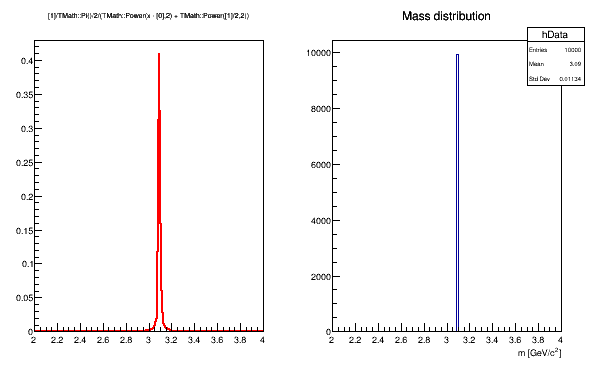

In [38]:
#Create a Canvas where the plot will be made
aCanvas = ROOT.TCanvas( 'aCanvas', 'Example plots', 600, 400)
aCanvas.Divide(2,1)
aCanvas.Draw()

#Create a function from given formula
breit_wigner = ROOT.TF1( 'breit_wigner', '[1]/TMath::Pi()/2/(TMath::Power(x - [0],2) + TMath::Power([1]/2,2))', 2, 4)
#Set names of the parameters
breit_wigner.SetParName(0, "m")
breit_wigner.SetParName(1, "Gamma")

#Set the values of parameters
breit_wigner.SetParameter("m", 3.096)
breit_wigner.SetParameter("Gamma", 0.0000926)

#Calculate the integral
integral = breit_wigner.Integral(2,4)
print("Function integral = ",integral)

#Print the function definition
breit_wigner.Print()

#Draw the function
aCanvas.cd(1)
breit_wigner.Draw()


#Create a histogram
hData = ROOT.TH1F("hData","Mass distribution;m [GeV/c^{2}];#events",100,2,4)

#Fill with random numbner samples from distribution given by user function
nEvents = 10000
hData.FillRandom('breit_wigner', nEvents)

aCanvas.cd(2)
hData.Draw()

## Homework

1)  generate random numbers following normal distributions using numbers from an uniform distribution
2) Make control plots. 

**Generation:** 

Each of following steps should be implemented in **a single line of code**, three lines in total for all the steps.    
* generate nPoints$\times$nSamples (```nPoints``` rows, ```nSamples``` columns) matrix of random numbers from uniform distribution in range [0,1].
  Use values: 
  
  ```Python
  
    nPoints = 100000
    nSamples = 120
    
  ```
* for each row sum all the columns
* subtract 0.5$\times$nSamples and divide by $\sqrt{nSamples/12}$

**Control plots:**

* plot histogram of the result on log and linear scales. Use ```bins=np.arange(-3,3,0.1)``` for the definition of bins
* overlay a line for normal distribution with proper scaling
* plot a ratio ```Histogram/Gauss```. Put attention to correct alignement between histogram and Gauss evaluation points

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


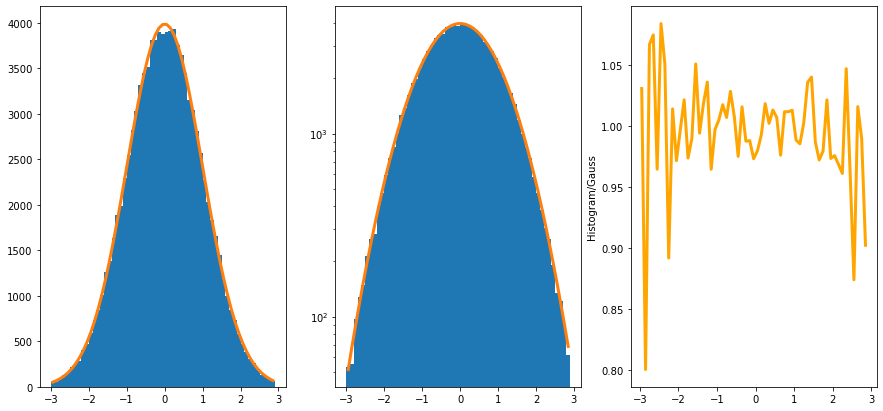

In [39]:
%time
nPoints = 100000
nSamples = 120
#BEGIN_SOLUTION
data = np.random.rand(nPoints,nSamples)
data = np.sum(data, axis=1)
data = (data-0.5*nSamples)/np.sqrt(nSamples*1.0/12)

axes = plt.figure(figsize=(15,7)).subplots(1,3)
counts, bins, _ = axes[0].hist(data,bins=np.arange(-3,3,0.1))
axes[1].hist(data,bins=np.arange(-3,3,0.1))
axes[1].set_yscale('log')

x = np.arange(-3.0+0.05,3.0-0.05,0.1)
y = nPoints/np.sqrt(2*np.pi)*np.exp(-x**2/2)*0.1
axes[0].plot(x,y, lw=3)
axes[1].plot(x,y, lw=3)

ratio = counts/y
axes[2].plot(x, ratio, lw=3, color="orange")
axes[2].set_ylabel('Histogram/Gauss')
#END_SOLUTION
pass